In the first part of this notebook the prepared and preprocessed data will be used to perform a sentiment analysis.

In the second part of the notebook the data is further prepared to use it in the end to create a plotly dashboard.

In [33]:
# Import necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
import nltk.sentiment.vader
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
import datetime as dt

In [2]:
# Download vader_lexicon from nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tobis\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Initialize SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [4]:
# Read in csv file with preprocessed data as pandas dataframe
df = pd.read_csv('SGE_prepared.csv')

In [5]:
# Show first five rows of pandas dataframe
df.head()

,Unnamed: 0,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords
0,0,2023-02-08,"b'@EduardoSGE @sge_ge habe, die meinen Magen/D...",Anna_scxl,"b'Manchmal Hessen, oft Hannover'","habe, die meinen Magen/Darm und Gebärmutter ...",2023-02-08 19:21:35+00:00,2,19,21,which affects my stomach/intestines and uterus...,affects stomach/intestines uterus leads severe...
1,1,2023-02-08,b'Eintracht hat das Derby gewonnen und die Sta...,SGEagle,"b'Nordrhein-Westfalen, Deutschla'",Eintracht hat das Derby gewonnen und die Stadt...,2023-02-08 19:21:12+00:00,2,19,21,Eintracht won the derby and the city is a litt...,Eintracht derby city little colorful usual tod...
2,2,2023-02-08,b'@iamdardann @lysander_sge 40er war echt brut...,sge_94,b'',40er war echt brutal voll. Deswegen bin ich ...,2023-02-08 19:20:38+00:00,2,19,20,40s was really brutally full. That's why I'm i...,40s really brutally full. That's I'm 42 right ...
3,3,2023-02-08,b'@EduardoSGE @sge_ge Ach das soll diese Sorge...,Anna_scxl,"b'Manchmal Hessen, oft Hannover'",Ach das soll diese Sorge sein? \n\nWenn du d...,2023-02-08 19:20:24+00:00,2,19,20,Oh that should be this worry?\n\nIf you really...,"Oh worry? If really cared, would asked sooner..."
4,4,2023-02-08,"b'R.I.P. Friedel Lutz, hier 3/2018 mit Dieter ...",fisPeppi,b'Frankfurt a.M.',"R.I.P. Friedel Lutz, hier 3/2018 mit Dieter St...",2023-02-08 19:19:38+00:00,2,19,19,"R.I.P. Friedel Lutz, here 3/2018 with Dieter S...","R.I.P. Friedel Lutz, 3/2018 Dieter Stinka Matz..."


In [6]:
# Show column names of dataframe
df.columns

Index(['Unnamed: 0', 'Date', 'Tweet', 'User', 'Location', 'tweet', 'time',
       'weekday', 'Hour', 'Minute', 'translated_tweet',
       'tweet_without_stopwords'],
      dtype='object')

In [7]:
# Only use necessary columns and exclude others
df = df[['Date', 'Tweet', 'User', 'Location',
       'tweet', 'time', 'weekday', 'Hour', 'Minute', 'translated_tweet','tweet_without_stopwords']]

In [8]:
# Show the length of the dataframe -> we have 2024 rows
len(df)

2024

In [9]:
# Convert time column to datetime
df['time'] = pd.to_datetime(df['time'])

In [10]:
df.dtypes

Date                                    object
Tweet                                   object
User                                    object
Location                                object
tweet                                   object
time                       datetime64[ns, UTC]
weekday                                  int64
Hour                                     int64
Minute                                   int64
translated_tweet                        object
tweet_without_stopwords                 object
dtype: object

In [11]:
# Convert column to string column
df['tweet_without_stopwords'] = df['tweet_without_stopwords'].astype(str)

In [12]:
# Compute the polarity scores
df['scores'] = df['tweet_without_stopwords'].apply(lambda tweet_without_stopwords: sid.polarity_scores(tweet_without_stopwords))

In [13]:
# New column in the form of a dictionary
df['scores']

0       {'neg': 0.541, 'neu': 0.459, 'pos': 0.0, 'comp...
1       {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2       {'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'comp...
3       {'neg': 0.242, 'neu': 0.5, 'pos': 0.258, 'comp...
4       {'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...
                              ...                        
2019    {'neg': 0.139, 'neu': 0.545, 'pos': 0.315, 'co...
2020    {'neg': 0.219, 'neu': 0.547, 'pos': 0.234, 'co...
2021    {'neg': 0.0, 'neu': 0.145, 'pos': 0.855, 'comp...
2022    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2023    {'neg': 0.0, 'neu': 0.828, 'pos': 0.172, 'comp...
Name: scores, Length: 2024, dtype: object

In [14]:
# Get the compound score as a new column
# Definition of the compound score:
# The compound score is the sum of positive, negative & neutral scores 
# which is then normalized between -1(most extreme negative) and +1 (most extreme positive).
df['compound'] = df['scores'].apply(lambda d: d['compound'])

In [15]:
# Get a new column which states if compound score is positive, negative or neutral
df['com_score'] = df['compound'].apply(lambda score: 'pos' if score > 0 else ('neg' if score < 0 else 'neu'))

In [99]:
# Show how many results for positive, negative and neutral sentiments we get
df['com_score'].value_counts()

pos    843
neu    802
neg    379
Name: com_score, dtype: int64

In [17]:
# Show first ten lines of the dataframe - com_score has different values
df.head(10)

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score
0,2023-02-08,"b'@EduardoSGE @sge_ge habe, die meinen Magen/D...",Anna_scxl,"b'Manchmal Hessen, oft Hannover'","habe, die meinen Magen/Darm und Gebärmutter ...",2023-02-08 19:21:35+00:00,2,19,21,which affects my stomach/intestines and uterus...,affects stomach/intestines uterus leads severe...,"{'neg': 0.541, 'neu': 0.459, 'pos': 0.0, 'comp...",-0.7096,neg
1,2023-02-08,b'Eintracht hat das Derby gewonnen und die Sta...,SGEagle,"b'Nordrhein-Westfalen, Deutschla'",Eintracht hat das Derby gewonnen und die Stadt...,2023-02-08 19:21:12+00:00,2,19,21,Eintracht won the derby and the city is a litt...,Eintracht derby city little colorful usual tod...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
2,2023-02-08,b'@iamdardann @lysander_sge 40er war echt brut...,sge_94,b'',40er war echt brutal voll. Deswegen bin ich ...,2023-02-08 19:20:38+00:00,2,19,20,40s was really brutally full. That's why I'm i...,40s really brutally full. That's I'm 42 right ...,"{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'comp...",-0.6478,neg
3,2023-02-08,b'@EduardoSGE @sge_ge Ach das soll diese Sorge...,Anna_scxl,"b'Manchmal Hessen, oft Hannover'",Ach das soll diese Sorge sein? \n\nWenn du d...,2023-02-08 19:20:24+00:00,2,19,20,Oh that should be this worry?\n\nIf you really...,"Oh worry? If really cared, would asked sooner...","{'neg': 0.242, 'neu': 0.5, 'pos': 0.258, 'comp...",0.0498,pos
4,2023-02-08,"b'R.I.P. Friedel Lutz, hier 3/2018 mit Dieter ...",fisPeppi,b'Frankfurt a.M.',"R.I.P. Friedel Lutz, hier 3/2018 mit Dieter St...",2023-02-08 19:19:38+00:00,2,19,19,"R.I.P. Friedel Lutz, here 3/2018 with Dieter S...","R.I.P. Friedel Lutz, 3/2018 Dieter Stinka Matz...","{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.5994,pos
5,2023-02-08,b'Bleibt Ansgar #Knauf noch bei @Eintracht ode...,wetten_com,b'Deutschland',Bleibt Ansgar Knauf noch bei oder geht er zur...,2023-02-08 19:19:29+00:00,2,19,19,Is Ansgar Knauf staying with us or is he going...,Is Ansgar Knauf staying us going back ? Find h...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
6,2023-02-08,b'@Anna_scxl @sge_ge Ja dann tu was dagegen od...,EduardoSGE,b'Im Herzen Von Europa ',Ja dann tu was dagegen oder du stirbst halt ...,2023-02-08 19:18:33+00:00,2,19,18,"Yes, then do something about it or you'll just...","Yes, something die earlier","{'neg': 0.453, 'neu': 0.233, 'pos': 0.314, 'co...",-0.2960,neg
7,2023-02-08,b'@EduardoSGE @sge_ge Es geht darum dass es of...,Anna_scxl,"b'Manchmal Hessen, oft Hannover'",Es geht darum dass es offensichtlich ist und...,2023-02-08 19:18:01+00:00,2,19,18,It's about it being obvious and everyone being...,It's obvious everyone aware,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
8,2023-02-08,b'@EduardoSGE @sge_ge Es ist offensichtlich da...,Anna_scxl,"b'Manchmal Hessen, oft Hannover'",Es ist offensichtlich dass Mehrgewicht Krank...,2023-02-08 19:17:38+00:00,2,19,17,It is obvious that excess weight promotes and ...,It obvious excess weight promotes causes disea...,"{'neg': 0.0, 'neu': 0.806, 'pos': 0.194, 'comp...",0.3400,pos
9,2023-02-08,b'@lysander_sge @sge_94 wird stetig auch unter...,iamdardann,b'Munich ',wird stetig auch untereinander mehr Stress i...,2023-02-08 19:17:33+00:00,2,19,17,you can easily observe that there is always mo...,easily observe always stress among block,"{'neg': 0.514, 'neu': 0.27, 'pos': 0.216, 'com...",-0.5106,neg


In [18]:
# Create a function to get the subjectivity
# Subjectivity quantifies the amount of personal opinion and factual information contained in the text. 
# The higher subjectivity means that the text contains personal opinion rather than factual information. 
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [19]:
df['Subjectivity'] = df['tweet_without_stopwords'].apply(getSubjectivity)

In [20]:
df.head()

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score,Subjectivity
0,2023-02-08,"b'@EduardoSGE @sge_ge habe, die meinen Magen/D...",Anna_scxl,"b'Manchmal Hessen, oft Hannover'","habe, die meinen Magen/Darm und Gebärmutter ...",2023-02-08 19:21:35+00:00,2,19,21,which affects my stomach/intestines and uterus...,affects stomach/intestines uterus leads severe...,"{'neg': 0.541, 'neu': 0.459, 'pos': 0.0, 'comp...",-0.7096,neg,0.000000
1,2023-02-08,b'Eintracht hat das Derby gewonnen und die Sta...,SGEagle,"b'Nordrhein-Westfalen, Deutschla'",Eintracht hat das Derby gewonnen und die Stadt...,2023-02-08 19:21:12+00:00,2,19,21,Eintracht won the derby and the city is a litt...,Eintracht derby city little colorful usual tod...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.383333
2,2023-02-08,b'@iamdardann @lysander_sge 40er war echt brut...,sge_94,b'',40er war echt brutal voll. Deswegen bin ich ...,2023-02-08 19:20:38+00:00,2,19,20,40s was really brutally full. That's why I'm i...,40s really brutally full. That's I'm 42 right ...,"{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'comp...",-0.6478,neg,0.542857
3,2023-02-08,b'@EduardoSGE @sge_ge Ach das soll diese Sorge...,Anna_scxl,"b'Manchmal Hessen, oft Hannover'",Ach das soll diese Sorge sein? \n\nWenn du d...,2023-02-08 19:20:24+00:00,2,19,20,Oh that should be this worry?\n\nIf you really...,"Oh worry? If really cared, would asked sooner...","{'neg': 0.242, 'neu': 0.5, 'pos': 0.258, 'comp...",0.0498,pos,0.200000
4,2023-02-08,"b'R.I.P. Friedel Lutz, hier 3/2018 mit Dieter ...",fisPeppi,b'Frankfurt a.M.',"R.I.P. Friedel Lutz, hier 3/2018 mit Dieter St...",2023-02-08 19:19:38+00:00,2,19,19,"R.I.P. Friedel Lutz, here 3/2018 with Dieter S...","R.I.P. Friedel Lutz, 3/2018 Dieter Stinka Matz...","{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.5994,pos,0.000000


In [21]:
df.describe()

,weekday,Hour,Minute,compound,Subjectivity
count,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
mean,1.236166,16.298419,29.079545,0.126962,0.329447
std,0.544197,5.464294,17.380198,0.374205,0.335186
min,0.000000,0.000000,0.000000,-0.938200,0.000000
25%,1.000000,12.000000,14.000000,0.000000,0.000000
50%,1.000000,19.000000,29.000000,0.000000,0.291667
75%,2.000000,21.000000,44.250000,0.421500,0.600000
max,2.000000,23.000000,59.000000,0.965200,1.000000


In [23]:
# Define threshold for subjectivity with 0.25
def getAnalysis(score):
    if score < 0.25:
        return 'Objective'
    else:
        return 'Subjective'

In [24]:
# Apply function to Subjectivity column
df['Subjectivity_score'] = df['Subjectivity'].apply(getAnalysis)

In [63]:
df['Subjectivity_score'].value_counts()

Subjective    1055
Objective      969
Name: Subjectivity_score, dtype: int64

In [25]:
df

,Date,Tweet,User,Location,tweet,time,weekday,Hour,Minute,translated_tweet,tweet_without_stopwords,scores,compound,com_score,Subjectivity,Subjectivity_score
0,2023-02-08,"b'@EduardoSGE @sge_ge habe, die meinen Magen/D...",Anna_scxl,"b'Manchmal Hessen, oft Hannover'","habe, die meinen Magen/Darm und Gebärmutter ...",2023-02-08 19:21:35+00:00,2,19,21,which affects my stomach/intestines and uterus...,affects stomach/intestines uterus leads severe...,"{'neg': 0.541, 'neu': 0.459, 'pos': 0.0, 'comp...",-0.7096,neg,0.000000,Objective
1,2023-02-08,b'Eintracht hat das Derby gewonnen und die Sta...,SGEagle,"b'Nordrhein-Westfalen, Deutschla'",Eintracht hat das Derby gewonnen und die Stadt...,2023-02-08 19:21:12+00:00,2,19,21,Eintracht won the derby and the city is a litt...,Eintracht derby city little colorful usual tod...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.383333,Subjective
2,2023-02-08,b'@iamdardann @lysander_sge 40er war echt brut...,sge_94,b'',40er war echt brutal voll. Deswegen bin ich ...,2023-02-08 19:20:38+00:00,2,19,20,40s was really brutally full. That's why I'm i...,40s really brutally full. That's I'm 42 right ...,"{'neg': 0.263, 'neu': 0.737, 'pos': 0.0, 'comp...",-0.6478,neg,0.542857,Subjective
3,2023-02-08,b'@EduardoSGE @sge_ge Ach das soll diese Sorge...,Anna_scxl,"b'Manchmal Hessen, oft Hannover'",Ach das soll diese Sorge sein? \n\nWenn du d...,2023-02-08 19:20:24+00:00,2,19,20,Oh that should be this worry?\n\nIf you really...,"Oh worry? If really cared, would asked sooner...","{'neg': 0.242, 'neu': 0.5, 'pos': 0.258, 'comp...",0.0498,pos,0.200000,Objective
4,2023-02-08,"b'R.I.P. Friedel Lutz, hier 3/2018 mit Dieter ...",fisPeppi,b'Frankfurt a.M.',"R.I.P. Friedel Lutz, hier 3/2018 mit Dieter St...",2023-02-08 19:19:38+00:00,2,19,19,"R.I.P. Friedel Lutz, here 3/2018 with Dieter S...","R.I.P. Friedel Lutz, 3/2018 Dieter Stinka Matz...","{'neg': 0.0, 'neu': 0.769, 'pos': 0.231, 'comp...",0.5994,pos,0.000000,Objective
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,2023-02-06,b'@SGE_Melli Ja schon aber trotzdem f\xc3\xbch...,Natascha_SGE,b'',Ja schon aber trotzdem fühlt man sich erst ma...,2023-02-06 19:37:13+00:00,0,19,37,"Yes, but you still feel old for a moment 😂😂😂 M...","Yes, still feel old moment 😂😂😂 Migraine victim...","{'neg': 0.139, 'neu': 0.545, 'pos': 0.315, 'co...",0.4404,pos,0.200000,Objective
2020,2023-02-06,b'@sensinho82 @SGEintracht1899 Musst du ehrlic...,EduardoSGE,b'Im Herzen Von Europa ',Musst du ehrlich so n stress schieben? Konze...,2023-02-06 19:35:37+00:00,0,19,35,Do you honestly have to push so n stress? Conc...,Do honestly push n stress? Concentrate game to...,"{'neg': 0.219, 'neu': 0.547, 'pos': 0.234, 'co...",0.0516,pos,0.650000,Subjective
2021,2023-02-06,b'@Natascha_SGE Klingt gut :)',taunusabbel,"b'Frankfurt am Main, Deutschland'",Klingt gut :),2023-02-06 19:35:04+00:00,0,19,35,Sounds good :),Sounds good :),"{'neg': 0.0, 'neu': 0.145, 'pos': 0.855, 'comp...",0.7096,pos,0.800000,Subjective
2022,2023-02-06,b'@faznet Wenn er sich hinter dem Pr\xc3\xa4si...,Schietweer,b'',"Wenn er sich hinter dem Präsidenten stellt, m...",2023-02-06 19:34:59+00:00,0,19,34,"If he stands behind the president, he doesn't ...","If stands behind president, notice nobody ther...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu,0.700000,Subjective


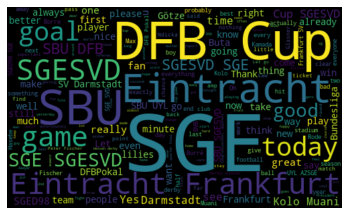

In [28]:
# Create and Plot a WordCloud in order to see the most frequent words in the tweets
allWords = ' '.join([twts for twts in df['tweet_without_stopwords']])
wordCloud = WordCloud(width = 500, height =300, random_state = 21, max_font_size = 119).generate(allWords)
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [29]:
pd.pivot_table(df, index = 'Date', values = 'compound')

,compound
Date,
2023-02-06,0.146440
2023-02-07,0.131861
2023-02-08,0.112329


In [30]:
# Add a new column with a value as auxiliary variable
df['value'] = 1

In [31]:
# Create a new dataframe which contains the count of positive, negative and neutral tweets
df_totalTweets = pd.pivot_table(df, index = 'com_score', values = 'value', aggfunc='count')
df_totalTweets

,value
com_score,
neg,379
neu,802
pos,843


In [32]:
# Save dataframe as csv file
df_totalTweets.to_csv('df_totalTweets_SGE.csv')

In [34]:
# Convert column Hour to integer value
df['Hour'] = df['Hour'].astype(int)

In [35]:
# Create new column datetime by combining the columns Date and Hour
df['datetime'] = df['Date'].astype(str) + ' '+ df['Hour'].astype(str)

In [36]:
# Replace specific charcaters
df['datetime'] = df['datetime'].str.replace('\s(\d)$', ' 0\\1')

<ipython-input-36-757bad35e65a>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['datetime'] = df['datetime'].str.replace('\s(\d)$', ' 0\\1')


In [38]:
# Convert column datetime to datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H')

In [40]:
# Create new dataframe datetime with mean compound value
df_datetime = pd.pivot_table(df, index = 'datetime', values = 'compound', aggfunc='mean')

In [42]:
df_datetime.head(3)

,compound
datetime,
2023-02-06 19:00:00,0.257357
2023-02-06 20:00:00,0.079676
2023-02-06 21:00:00,0.069247


In [43]:
# Create dataframe day grouped by com_score and counted
df_day = pd.pivot_table(df, index = 'weekday', values = 'value', columns = 'com_score', aggfunc='count')

In [44]:
# Show df_day
df_day.head(7)

com_score,neg,neu,pos
weekday,,,
0,21,47,49
1,245,512,555
2,113,243,239


In [45]:
df_day.reset_index(inplace=True)

In [50]:
# Create a auxiliary dictionary with weekdays
d = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

In [47]:
# Create a new dataframe from the dictionary
df_weekday = pd.DataFrame(d.items(), columns=['weekday', 'day'])

In [48]:
# Merge df_day and df_weekday in order to get a new column with day
df_day = pd.merge(df_day,df_weekday, how='inner',on='weekday')

In [49]:
df_day.head(8)

,weekday,neg,neu,pos,day
0,0,21,47,49,Monday
1,1,245,512,555,Tuesday
2,2,113,243,239,Wednesday


In [51]:
# Save df_day as csv file
df_day.to_csv('df_day_SGE.csv')

In [52]:
# Create and save df_hour
df_hour = pd.pivot_table(df, index = 'Hour', values = 'value', columns = 'com_score', aggfunc='count')
df_hour.to_csv('df_hour_SGE.csv')

In [54]:
# Create and show df_sentiment
df_sentiment = pd.pivot_table(df, index = 'datetime', values = 'value', columns = 'com_score', aggfunc='count')
df_sentiment.head()

com_score,neg,neu,pos
datetime,,,
2023-02-06 19:00:00,4.0,8.0,18.0
2023-02-06 20:00:00,13.0,19.0,18.0
2023-02-06 21:00:00,4.0,9.0,6.0
2023-02-06 22:00:00,NaN,8.0,3.0
2023-02-06 23:00:00,NaN,3.0,4.0


In [55]:
# Save df_sentiment as csv file
df_sentiment.to_csv('df_sentiment_SGE.csv')

In [65]:
df_subjectivity = pd.pivot_table(df, index = 'datetime', values = 'value', columns = 'Subjectivity_score', aggfunc='count')
df_subjectivity.to_csv('df_subjectivity.csv')

In [58]:
# Create df_User
df_user = pd.pivot_table(df, index = 'User', values = 'value', aggfunc='count')

In [59]:
df_user

,value
User,
1Wellensittich,2
1tr8Fan,5
23oliver01,1
2Ullsen,1
4ttila78,4
...,...
xilliamxolden,1
xilliman,1
ysvw,1


In [60]:
# Sort df_user and just take top users with more than 25 tweets
df_user = df_user.sort_values(by=['value'], ascending=False)
df_topUser = df_user[df_user['value']>25]

In [61]:
# Show df_topUser
df_topUser

,value
User,
Natascha_SGE,87
Eintracht,66
GG_SGE,58
sge_bot,57
eintracht_lz,53
Dani5ooo,42
SGE_Papa,35
nurdie_sge,29
Kev_SGE_1899,28


In [62]:
# Save df_topUser as csv File
df_topUser.to_csv('df_topUser.csv')